### Artificial Neural Networks

In [1]:
#------------------------------------------------------------------------------------
#IMPORT THE REQUIRED LIBRARIES
#------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import TensorBoard, History 
from sklearn.utils import class_weight
from utils_gaia import keras_model_m, best_ANN, model_epoch, plot_prediction, model_early, plot_prediction_early_stopping, heatmapconf_recall_prec, subset
import timeit
import warnings
warnings.filterwarnings("ignore")

#Data loading
df= pd.read_csv("Spectrums_columns.csv")
df = df.drop(columns=['Unnamed: 0'])

#We standardize, average 0 standard deviation 1
scaler = StandardScaler()
fited=scaler.fit(df.iloc[:,6:66])
df.iloc[:,6:66]=scaler.transform(df.iloc[:,6:66])
scaler = StandardScaler()
fited=scaler.fit(df.iloc[:,66:])
df.iloc[:,66:]=scaler.transform(df.iloc[:,66:])

##### Seeking of the best model

### Subset 4000 random spectra

In [77]:
#subdf.to_csv('SubsetANN_14_12_2020.csv')
subdf = pd.read_csv('SubsetANN_14_12_2020.csv')
subdf = subdf.drop(columns=['Unnamed: 0'])

In [78]:
#------------------------------------
#SUBSET
#----------------------------------
Y_sub=subdf['feature'].to_numpy()
enc=OneHotEncoder(sparse=False)
reshaped=Y_sub.reshape(len(Y_sub), 1)
y_onehot_sub=enc.fit_transform(reshaped)

X_sub = subdf.iloc[:,6:]


#80% training, 20% testing
validation_size = 0.20
#Semilla inicial
seed = 4

#Training and test
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_onehot_sub,\
                                                                    test_size=validation_size, random_state=seed)
#Validation set (500 elements)
x_val = X_train_sub[:500]
partial_x_train = X_train_sub[500:]

y_val = y_train_sub[:500]
partial_y_train = y_train_sub[500:]

In [20]:
#We will apply the "best_ANN" function over some architectures, optimizers, activation functions, 
#learning rates, epochs and batches.

#Architectures with 3 hidden layers
m0 = [120, 92, 64, 36, 8]
m1 = [120, 90, 60, 20, 8]
m2 = [120, 150, 100, 50, 8]
m3 = [120, 140, 70, 30,  8]

#Architectures with 4 hidden layers
m4 = [120, 96, 74,  52,  30,  8]
m5 = [120, 100, 80,  40,  20,  8]
m6 = [120, 150, 100,  50, 20,  8]
m7 = [120, 140, 100,  75, 30,  8]

#Values under consideration
arc = [m0, m1, m2, m3, m4, m5, m6, m7]
batch = [12, 32, 64]
opti = [keras.optimizers.Adam, keras.optimizers.Adamax, keras.optimizers.Nadam, keras.optimizers.RMSprop]
opti_name = ["Adam", "Adamax", "Nadam","RMSprop"]
epo = [50, 100]
acti = ['tanh', 'softsign', 'selu', 'elu', 'relu']
lr = [0.01,0.1, 1]

#We implement the function
Lay_results = best_ANN(arc, lr, batch, opti, opti_name, epo, acti,\
                        partial_x_train, partial_y_train, X_test_sub, y_test_sub, x_val, y_val)

[120, 92, 64, 36, 8]
[120, 90, 60, 20, 8]
[120, 150, 100, 50, 8]
[120, 140, 70, 30, 8]
[120, 96, 74, 52, 30, 8]
[120, 100, 80, 40, 20, 8]
[120, 150, 100, 50, 20, 8]
[120, 140, 100, 75, 30, 8]
Computation time = 49099.87043549999s


In [22]:
#Lay_results.to_csv('Lay_results_26122020.csv')

In [21]:
#Lay_results = pd.read_csv('Lay_results_26122020.csv')
#Lay_results = Lay_results.drop(columns=['Unnamed: 0'])
Lay_results.head(20)

,Model,Structure,Learning_rate,Batch_size,Epochs,Optimizer,Activation,Cost,Accuracy
0,4,"[120, 96, 74, 52, 30, 8]",0.01,64,50,Adamax,selu,1.900492,0.46125
1,0,"[120, 92, 64, 36, 8]",0.01,32,50,Adamax,softsign,1.762936,0.45625
2,1,"[120, 90, 60, 20, 8]",0.01,64,100,Adamax,elu,2.519350,0.45000
3,1,"[120, 90, 60, 20, 8]",0.01,64,100,Adamax,selu,2.571219,0.44750
4,4,"[120, 96, 74, 52, 30, 8]",0.01,64,50,Adamax,elu,1.754608,0.44500
5,0,"[120, 92, 64, 36, 8]",0.01,32,50,Adamax,elu,1.999488,0.44125
6,5,"[120, 100, 80, 40, 20, 8]",0.01,32,50,Adamax,selu,2.042675,0.44125
7,1,"[120, 90, 60, 20, 8]",0.01,64,50,Adamax,elu,1.712411,0.44000
8,1,"[120, 90, 60, 20, 8]",0.01,64,100,Adamax,softsign,1.973824,0.44000
9,6,"[120, 150, 100, 50, 20, 8]",0.01,64,100,Adamax,elu,4.388188,0.43750


In [79]:
#We will try with architectures with a biggest second later

#Architectures with 4 hidden layers
m8 = [120, 200, 100,  50, 20,  8]
m9 = [120, 256, 150,  75, 30,  8]

#We choose the best hyperparametes obtained in the previous survey
arc = [m8, m9]
batch = [32, 64]
opti = [keras.optimizers.Adamax]
opti_name = ["Adamax"]
epo = [50, 100]
acti = ['selu', 'elu', 'softsign']
lr = [0.01]


Lay_results2 = best_ANN(arc, lr, batch, opti, opti_name, epo, acti,\
                        partial_x_train, partial_y_train, X_test_sub, y_test_sub, x_val, y_val)

[120, 200, 100, 50, 20, 8]
[120, 256, 150, 75, 30, 8]
Computation time = 156.5748954999999s


In [24]:
Lay_results2.head()

,Model,Structure,Learning_rate,Batch_size,Epochs,Optimizer,Activation,Cost,Accuracy
0,0,"[120, 200, 100, 50, 20, 8]",0.01,64,50,Adamax,elu,1.955587,0.43500
1,1,"[120, 256, 150, 75, 30, 8]",0.01,32,50,Adamax,selu,4.076736,0.43125
2,0,"[120, 200, 100, 50, 20, 8]",0.01,32,50,Adamax,elu,2.564401,0.42625
3,0,"[120, 200, 100, 50, 20, 8]",0.01,32,100,Adamax,selu,7.303948,0.41750
4,0,"[120, 200, 100, 50, 20, 8]",0.01,32,100,Adamax,elu,7.205038,0.41625


### Complete dataset

##### The complete dataset is used in the following chunks

In [2]:
#Models under study
m4 = [120, 96, 74,  52,  30,  8]
m0 = [120, 92, 64, 36, 8]
m1 = [120, 90, 60, 20, 8]
m8 = [120, 200, 100,  50, 20,  8]
m9 = [120, 256, 150,  75, 30,  8]

In [2]:
#------------------------------------
#FULL DATASET
#----------------------------------

Y=df['feature'].to_numpy()
enc=OneHotEncoder(sparse=False)
reshaped=Y.reshape(len(Y), 1)
y_onehot=enc.fit_transform(reshaped)

X = df.iloc[:,6:]

#Seed
seed = 4

#90% training, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.1, random_state=seed)

#Validation set (10000 Elements)
n_val = 10000
x_val = X_train[:n_val]
partial_x_train = X_train[n_val:]

y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]

#We fix the imbalanced problem with "class_weight"
y_integers = np.argmax(y_train, axis=1)
y_test_integers = np.argmax(y_test, axis=1)
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers )
dcw = dict(enumerate(class_weights))

### Best model: Model 4 | Nº1 (Dissertation)

In [23]:
#Model 4 | Obtain with subset
model_epoch(m4, 0.01, 'selu', keras.optimizers.Adamax, 50, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.2633293867111206, 'accuracy': 0.5098116397857666}

In [28]:
#Model  4 | 100 epochs
model_epoch(m4, 0.01, 'selu', keras.optimizers.Adamax, 100, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.2244651317596436, 'accuracy': 0.5575386881828308}

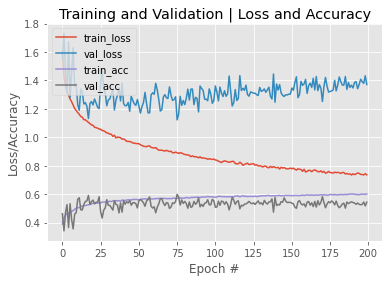

In [4]:
#Model 4 | 200 epochs
m4200  = model_epoch(m4, 0.01, 'selu', keras.optimizers.Adamax, 200, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(200, m4200[1])

In [5]:
m4200[0]

{'loss': 1.3537652492523193, 'accuracy': 0.5508332252502441}

### Second best model: Model 0 | Nº2 (Dissertation)

In [4]:
#Model 0 | Obtain with subset
model_epoch(m0, 0.01, 'softsign', keras.optimizers.Adamax, 50, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.2293249368667603, 'accuracy': 0.5221378803253174}

In [5]:
#Model  0 | 100 epochs
model_epoch(m0, 0.01, 'softsign', keras.optimizers.Adamax, 100, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.2550472021102905, 'accuracy': 0.5359432101249695}

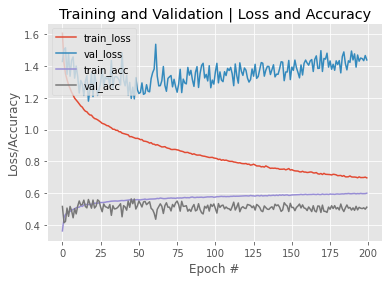

In [6]:
#Model 0 | 200 epochs
m0200  = model_epoch(m0, 0.01, 'softsign', keras.optimizers.Adamax, 200, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(200, m0200[1])

In [7]:
m0200[0]

{'loss': 1.4056706428527832, 'accuracy': 0.516714334487915}

### Third best model: Model 1 | Nº3 (Dissertation)

In [11]:
#Model 1 | Obtain with subset
model_epoch(m1, 0.01, 'elu', keras.optimizers.Adamax, 100, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.23800790309906, 'accuracy': 0.540676474571228}

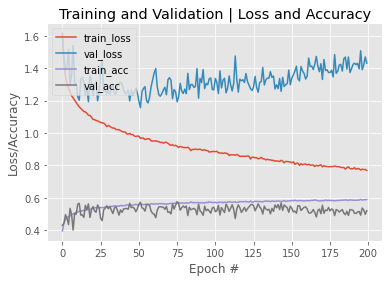

In [8]:
#Model 1 | 200 epochs
m1200  = model_epoch(m1, 0.01, 'elu', keras.optimizers.Adamax, 200, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(200, m1200[1])

In [10]:
m1200[0]

{'loss': 1.395051121711731, 'accuracy': 0.5305196642875671}

### Longer second layer model 8 | Nº4 (Dissertation)

In [67]:
#Model 8
m8 = [120, 200, 100,  50, 20,  8]
model_epoch(m8, 0.01, 'elu', keras.optimizers.Adamax, 50, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.2556345462799072, 'accuracy': 0.5456069707870483}

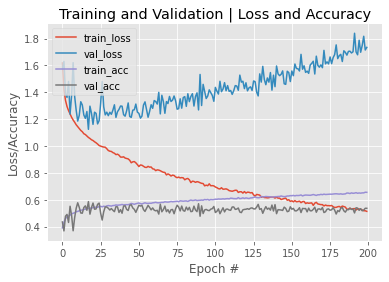

In [68]:
m8200  = model_epoch(m8, 0.01, 'elu', keras.optimizers.Adamax, 200, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(200, m8200[1])

In [69]:
m8200[0]

{'loss': 1.6901428699493408, 'accuracy': 0.5432403087615967}

### Longer second layer model 9 | Nº5 (Dissertation)

In [70]:
#Model 9
model_epoch(m9, 0.01, 'selu', keras.optimizers.Adamax, 50, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)[0]

{'loss': 1.375238060951233, 'accuracy': 0.4931466281414032}

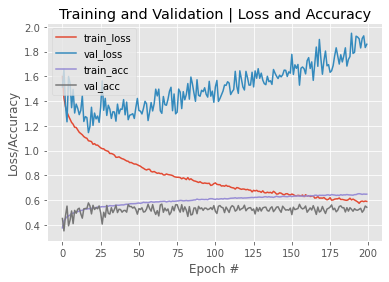

In [72]:
m9200  = model_epoch(m9, 0.01, 'selu', keras.optimizers.Adamax, 200, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(200, m9200[1])

In [73]:
m9200[0]

{'loss': 1.8035638332366943, 'accuracy': 0.5512276887893677}

------------------------------------------------------------------

------------------------------------------------------------------

## There is overfitting we search for models with less layers

##### The subset is used in the following chunks

In [4]:
#New architectures under study
m10 = [120, 32, 16, 8]
m11 = [120, 60, 30, 8]
m12 = [120, 30, 8]
m13 = [120, 60, 8]

In [29]:
#The subset is used in this chunk
#Run this code again
#subdf = pd.read_csv('SubsetANN_14_12_2020.csv')
#subdf = subdf.drop(columns=['Unnamed: 0'])

arc = [m10, m11, m12, m13]
batch = [32, 64]
opti = [keras.optimizers.Adamax]
opti_name = ["Adamax"]
epo = [50, 100]
acti = [ 'selu', 'elu', 'softsign']
lr = [0.01]

Lay_results_LESS = best_ANN(arc, lr, batch, opti, opti_name, epo, acti,\
                        partial_x_train, partial_y_train, X_test_sub, y_test_sub, x_val, y_val)

[120, 32, 16, 8]
[120, 60, 30, 8]
[120, 30, 8]
[120, 60, 8]
Computation time = 203.7856127s


In [32]:
Lay_results_LESS.head()

,Model,Structure,Learning_rate,Batch_size,Epochs,Optimizer,Activation,Cost,Accuracy
0,0,"[120, 32, 16, 8]",0.01,64,100,Adamax,selu,2.008241,0.44500
1,1,"[120, 60, 30, 8]",0.01,32,100,Adamax,selu,2.956501,0.43375
2,0,"[120, 32, 16, 8]",0.01,32,100,Adamax,softsign,1.807093,0.43000
3,0,"[120, 32, 16, 8]",0.01,64,50,Adamax,softsign,1.613838,0.43000
4,1,"[120, 60, 30, 8]",0.01,64,100,Adamax,selu,2.367307,0.42875


##### The complete dataset is used in the following chunks

### Model 10 | Nº6 (Dissertation)

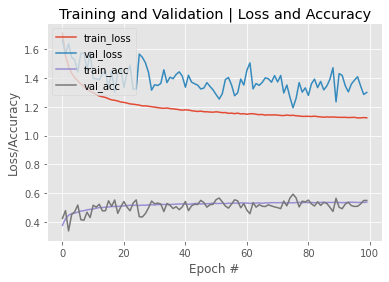

In [6]:
#Model 10
m10100 = model_epoch(m10, 0.01, 'selu', keras.optimizers.Adamax, 100, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(100, m10100[1])

In [7]:
m10100[0]

{'loss': 1.2724474668502808, 'accuracy': 0.5519179701805115}

### Model 11 | Nº7 (Dissertation)

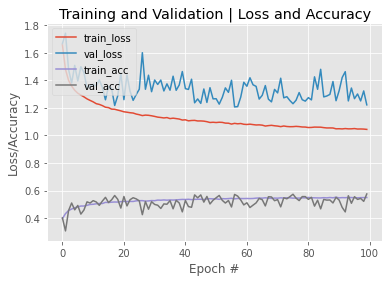

In [8]:
#Modelo 11
m11100 = model_epoch(m11, 0.01, 'selu', keras.optimizers.Adamax, 100, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction(100, m11100[1])

In [9]:
m11100[0]

{'loss': 1.2133662700653076, 'accuracy': 0.5858396887779236}

------------------------------------------------------------------

------------------------------------------------------------------

## Early stopping

##### The complete dataset is used in the following chunks

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

###  Model 4 | Nº1 (Dissertation)

Epoch 00043: early stopping


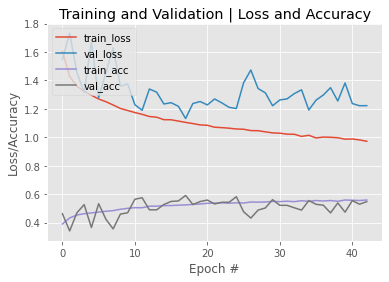

In [79]:
#Model 4. ES
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)
m4es = model_early(m4, 0.01, 'selu', keras.optimizers.Adamax, es, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction_early_stopping(m4es[1])

In [80]:
m4es[0]

{'loss': 1.2068805694580078, 'accuracy': 0.5512276887893677}

### Model 0 | Nº2 (Dissertation)

Epoch 00058: early stopping


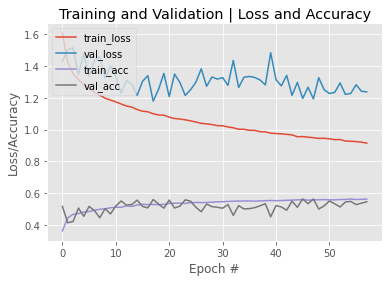

In [53]:
#Model 0.ES  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 40)
m0es = model_early(m0, 0.01, 'softsign', keras.optimizers.Adamax, es, 32, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction_early_stopping(m0es[1])

In [54]:
m0es[0]

{'loss': 1.2063748836517334, 'accuracy': 0.5583275556564331}

### Model 1 | Nº3 (Dissertation)

Epoch 00087: early stopping


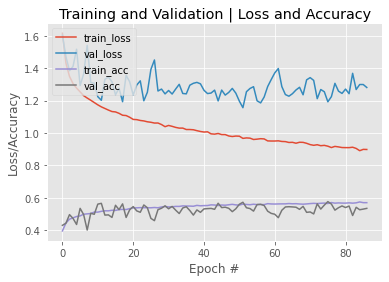

In [57]:
#Model 1.ES  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 35)
m1es = model_early(m1, 0.01, 'elu', keras.optimizers.Adamax, es, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction_early_stopping(m1es[1])

In [58]:
m1es[0]

{'loss': 1.2587339878082275, 'accuracy': 0.5418598055839539}

### Model 8 | Nº4 (Dissertation)

Epoch 00033: early stopping


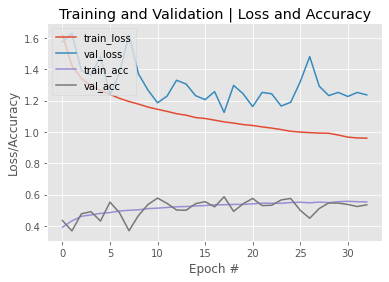

In [77]:
#Model 8.ES 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 15)
m8es  = model_early(m8, 0.01, 'elu', keras.optimizers.Adamax, es, 64, dcw,\
            partial_x_train, partial_y_train, X_test, y_test, x_val, y_val)
plot_prediction_early_stopping(m8es[1])

In [81]:
m8es[0]

{'loss': 1.2349823713302612, 'accuracy': 0.5426486730575562}

------------------------------------------------------------------

------------------------------------------------------------------

## FINAL MODEL ANN. MODEL 11 | Nº7 (Dissertation)

In [11]:
#Predictions made for the test set
pred = m11100[2].predict_classes(X_test, verbose=0)

#Metrics
av = 'macro'
decimal = 3
metrics = {'Precision': round(precision_score(y_test_integers, pred, average = av), decimal),
            'Recall': round(recall_score(y_test_integers, pred, average = av), decimal),
            'F1 score': round(f1_score(y_test_integers, pred, average = av), decimal),
            'Accuracy': round(accuracy_score(y_test_integers, pred), decimal)}
print(metrics)

{'Precision': 0.49, 'Recall': 0.581, 'F1 score': 0.51, 'Accuracy': 0.586}


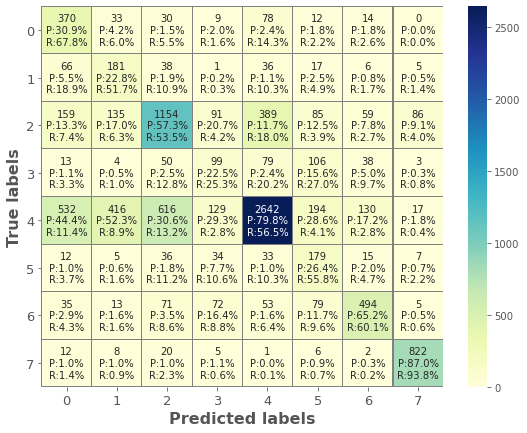

In [16]:
#Confusion Matrix
label = list(np.unique(y_integers))
cma = confusion_matrix(y_test_integers, pred, label)
heatmapconf_recall_prec(cma, label)